In [1]:
import pandas as pd
import numpy as np
import json
import requests

from keplergl import KeplerGl

In [4]:
%%bash
$(! -f "GPS Trajectory.rar") && wget https://archive.ics.uci.edu/ml/machine-learning-databases/00354/GPS%20Trajectory.rar

bash: line 1: -f: command not found
--2022-02-04 19:10:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00354/GPS%20Trajectory.rar
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 220690 (216K) [application/x-httpd-php]
Salvataggio in: «GPS Trajectory.rar.1»

     0K .......... .......... .......... .......... .......... 23%  134K 1s
    50K .......... .......... .......... .......... .......... 46%  276K 1s
   100K .......... .......... .......... .......... .......... 69% 7,94M 0s
   150K .......... .......... .......... .......... .......... 92% 7,91M 0s
   200K .......... .....                                      100% 89,7K=0,7s

2022-02-04 19:10:18 (291 KB/s) - «GPS Trajectory.rar.1» salvato [220690/220690]



In [10]:
%%bash
rm "GPS Trajectory.rar.1"

In [12]:
%%bash
rar x "GPS Trajectory.rar"


RAR 6.10   Copyright (c) 1993-2022 Alexander Roshal   24 Jan 2022
Trial version             Type 'rar -?' for help


Extracting from GPS Trajectory.rar

Creating    GPS Trajectory                                            OK
Extracting  GPS Trajectory/go_track_tracks.csv                             1%  OK 
Extracting  GPS Trajectory/go_track_trackspoints.csv                      16% 31% 46% 61% 76% 90% 99%  OK 
All OK


In [4]:
df = pd.read_csv("GPS Trajectory/go_track_trackspoints.csv")

In [5]:
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [77]:
KeplerGl(height=400, data={"data_1": df}) #, config=config)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':           id   latitude  longitude  track_id                 time
0          1 -10.93…

In [15]:
map_2.save_to_html(file_name='first_map.html', data={"data_1": df}) #, config=config)

Map saved to first_map.html!


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

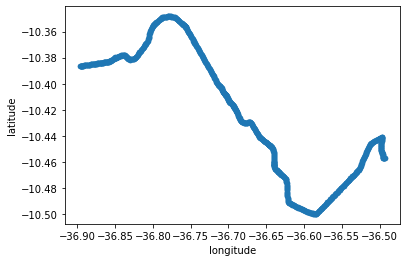

In [8]:
df_cut = df[(df['latitude']<-10.30) & (df['longitude']>-36.9)]
df_cut.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd") #c="brightness")

In [13]:
mu, sigma = 0, 0.0002 
noise = np.random.normal(mu, sigma, [len(df_cut.index),])
df_cut.loc[:,'latitude'] = df_cut.loc[:,'latitude'] + noise
df_cut.loc[:,'longitude'] = df_cut.loc[:,'longitude'] + noise

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

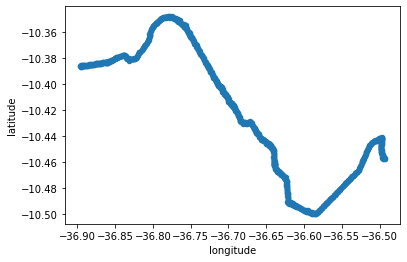

In [14]:
df_cut.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd") #c="brightness")

In [ ]:
#/match/v1/{profile}/{coordinates}?steps={true|false}&geometries={polyline|polyline6|geojson}&overview={simplified|full|false}&annotations={true|false}
#http://router.project-osrm.oxrg/match/v1/driving/8.610048,46.99917;8.620048,46.99917?overview=full&radiuses=49;49
#points expressed as lat,long

In [71]:
# if url is too large, decimate series using polyline
from rdp import rdp
#df_cut[['latitude','longitude']].to_numpy()
#rdp(df_cut[['latitude','longitude']].to_numpy(), epsilon=0.5)

decimated = rdp(df_cut[['latitude','longitude']].to_numpy(), epsilon=0.06)
df_decimated = pd.DataFrame(decimated, columns = ['latitude','longitude'])

print(df_cut.shape[0], df_decimated.shape[0])

KeplerGl(height=400, data={"data_1": df_decimated})

1294 128
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':       latitude  longitude
0   -10.457355 -36.493557
1   -10.498396 -36.597052
2   -10…

In [72]:
# Sending a request to OSRM matcher
base_url = "http://router.project-osrm.org/match/v1/driving/"
#base_url = "http://localhost:5005/match/v1/driving/"
headers = {'Content-type': 'application/json'}

In [73]:
points=";".join(
    df_decimated[['latitude','longitude']].apply(lambda r : "{},{}".format(r['latitude'], r['longitude']), axis=1).tolist()
)
url = "{}{}?overview=full&radiuses=49;49".format(base_url, points)
print(url)

http://router.project-osrm.org/match/v1/driving/-10.457354660981604,-36.49355707098161;-10.498395960576069,-36.59705244057607;-10.438777492583215,-36.661352012583215;-10.457191428359177,-36.493393838359175;-10.432587291231302,-36.6681828012313;-10.454351881162903,-36.495315411162906;-10.429947133444012,-36.671596433444016;-10.452299483281948,-36.497019143281946;-10.428830441572915,-36.671404851572916;-10.451875049002938,-36.49723923900294;-10.429464274182026,-36.674041294182025;-10.449913947844742,-36.497993737844745;-10.430215655302405,-36.676224665302406;-10.449483333388157,-36.49806183338816;-10.430128069507575,-36.677403139507575;-10.448228060714538,-36.49786849071453;-10.430388591475285,-36.680862801475286;-10.447057878390966,-36.49805068839097;-10.429057907020937,-36.680745307020935;-10.445915505564088,-36.49738333556408;-10.429183526981262,-36.68280092698126;-10.445450067620294,-36.49776381762029;-10.429297211863531,-36.68390020186354;-10.444308625829251,-36.497118015829244;-10.

In [74]:
#data = str(body)
#r = requests.post(url, data=data, headers=headers)
r = requests.get(url)

In [75]:
r.status_code

400

In [76]:
if r.status_code == 200:
    print(json.loads(r.text))
    